Grafo original com 3 nós:
Arestas do grafo original: [(0, 1), (0, 2), (1, 2)]


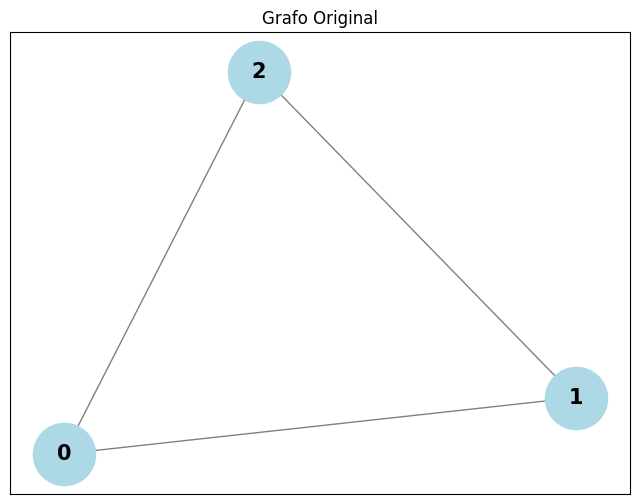

Número de arestas removíveis mantendo o grafo ligado: 1
Arestas removíveis: {(0, 1)}
Grafo resultante após remoção das arestas:


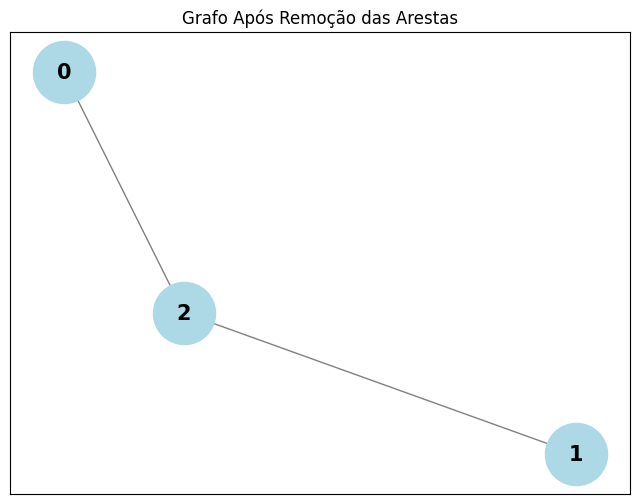

In [18]:
from IPython import get_ipython
from IPython.display import display
import networkx as nx
import random
import matplotlib.pyplot as plt
from itertools import combinations

def generate_strongly_connected_graph(N):
    while True:
        G = nx.Graph()

        # Adicionar os nós
        G.add_nodes_from(range(N))

        # Conectar cada nó com 1 a 3 descendentes
        for node in G.nodes():
            num_descendants = random.randint(1, 3)
            potential_descendants = [n for n in G.nodes() if n != node and not G.has_edge(node, n)]

            descendants = random.sample(potential_descendants, min(num_descendants, len(potential_descendants)))

            for descendant in descendants:
                G.add_edge(node, descendant)

        if nx.is_connected(G):
            return G

def find_max_removable_edges(G):
    max_removable_edges = set()
    for i in range(len(G.edges()), 0, -1):
      for edge_set in combinations(G.edges(), i):
          G_temp = G.copy()
          G_temp.remove_edges_from(edge_set)
          if nx.is_connected(G_temp):
              return set(edge_set)
    return max_removable_edges

def plot_graph(G, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=15, font_color='black', font_weight='bold')

    plt.title(title)
    plt.show()


N = random.randint(6, 10)
G = generate_strongly_connected_graph(N)

print(f"Grafo original com {N} nós:")
print(f"Arestas do grafo original: {list(G.edges())}")
plot_graph(G, "Grafo Original")

removable_edges = find_max_removable_edges(G)

G_result = G.copy()
G_result.remove_edges_from(removable_edges)

print(f"Número de arestas removíveis mantendo o grafo ligado: {len(removable_edges)}")
print(f"Arestas removíveis: {removable_edges}")

for edge in removable_edges:
    if not G.has_edge(*edge):
        print(f"Erro: a aresta {edge} não existe no grafo original!")

print("Grafo resultante após remoção das arestas:")
plot_graph(G_result, "Grafo Após Remoção das Arestas") # Corrected line